In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_excel('encoded_db.xlsx')
df

,Unnamed: 0,index,date,Encoded Products,Cadereyta total $,Cadereyta ctdad,Coahuila total $,Coahuila ctdad,Durango total $,Durango ctdad,...,Queretaro total $,Queretaro ctdad,Reynosa total $,Reynosa ctdad,San Luis total $,San Luis ctdad,Total libre de impuestos,Ctdad Ordenada,Indefinido total $,Indefinido ctdad
0,0,4,02 ene 2022,Producto 11,0.00,0.0,0.000,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,18162.13,3.5,58623.600,10.5,NaN,NaN
1,1,5,02 ene 2022,Producto 6,0.00,0.0,0.000,0.0,0.0,0.0,...,23477.44,3.5,0.0,0.0,0.00,0.0,23477.440,3.5,NaN,NaN
2,2,6,02 ene 2022,Producto 24,0.00,0.0,0.000,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,31083.500,3.5,NaN,NaN
3,3,7,02 ene 2022,Producto 15,0.00,0.0,0.000,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,42846.020,7.0,NaN,NaN
4,4,8,02 ene 2022,Producto 9,0.00,0.0,27154.855,3.5,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,27154.855,3.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26459,26459,4317,31 dic 2023,Producto 273,0.00,0.0,34740.090,3.5,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,60970.805,7.0,NaN,NaN
26460,26460,4318,31 dic 2023,Producto 273,35273.21,3.5,0.000,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,35273.210,3.5,NaN,NaN
26461,26461,4319,31 dic 2023,Producto 273,0.00,0.0,0.000,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,41274.205,3.5,NaN,NaN
26462,26462,4320,31 dic 2023,Producto 273,0.00,0.0,0.000,0.0,0.0,0.0,...,15192.10,3.5,0.0,0.0,0.00,0.0,15192.100,3.5,NaN,NaN


In [3]:
df.date.unique()

array(['     02 ene 2022', '     03 ene 2022', '     04 ene 2022',
       '     05 ene 2022', '     06 ene 2022', '     07 ene 2022',
       '     08 ene 2022', '     09 ene 2022', '     10 ene 2022',
       '     11 ene 2022', '     12 ene 2022', '     13 ene 2022',
       '     14 ene 2022', '     15 ene 2022', '     16 ene 2022',
       '     17 ene 2022', '     18 ene 2022', '     19 ene 2022',
       '     20 ene 2022', '     21 ene 2022', '     22 ene 2022',
       '     23 ene 2022', '     24 ene 2022', '     25 ene 2022',
       '     26 ene 2022', '     27 ene 2022', '     28 ene 2022',
       '     29 ene 2022', '     30 ene 2022', '     31 ene 2022',
       '     01 feb 2022', '     02 feb 2022', '     03 feb 2022',
       '     04 feb 2022', '     05 feb 2022', '     06 feb 2022',
       '     07 feb 2022', '     08 feb 2022', '     09 feb 2022',
       '     10 feb 2022', '     11 feb 2022', '     12 feb 2022',
       '     13 feb 2022', '     14 feb 2022', '     15 feb 20

In [4]:
df['date'] = df['date'].str.strip()
df.date.unique()

array(['02 ene 2022', '03 ene 2022', '04 ene 2022', '05 ene 2022',
       '06 ene 2022', '07 ene 2022', '08 ene 2022', '09 ene 2022',
       '10 ene 2022', '11 ene 2022', '12 ene 2022', '13 ene 2022',
       '14 ene 2022', '15 ene 2022', '16 ene 2022', '17 ene 2022',
       '18 ene 2022', '19 ene 2022', '20 ene 2022', '21 ene 2022',
       '22 ene 2022', '23 ene 2022', '24 ene 2022', '25 ene 2022',
       '26 ene 2022', '27 ene 2022', '28 ene 2022', '29 ene 2022',
       '30 ene 2022', '31 ene 2022', '01 feb 2022', '02 feb 2022',
       '03 feb 2022', '04 feb 2022', '05 feb 2022', '06 feb 2022',
       '07 feb 2022', '08 feb 2022', '09 feb 2022', '10 feb 2022',
       '11 feb 2022', '12 feb 2022', '13 feb 2022', '14 feb 2022',
       '15 feb 2022', '16 feb 2022', '17 feb 2022', '18 feb 2022',
       '19 feb 2022', '20 feb 2022', '21 feb 2022', '22 feb 2022',
       '23 feb 2022', '24 feb 2022', '25 feb 2022', '26 feb 2022',
       '27 feb 2022', '28 feb 2022', '01 mar 2022', '02 mar 20

In [5]:
def cambiar_formato_fecha(fecha):
    partes = fecha.split()  # Dividir la fecha en partes: ['01', 'ene', '2024']
    meses = {
        'ene': '01', 'feb': '02', 'mar': '03', 'abr': '04',
        'may': '05', 'jun': '06', 'jul': '07', 'ago': '08',
        'sep': '09', 'oct': '10', 'nov': '11', 'dic': '12'
    }
    mes_numero = meses.get(partes[1].lower())  # Obtener el número de mes del diccionario
    nuevo_formato = partes[0] + '-' + mes_numero + '-' + partes[2]  # Construir el nuevo formato: '01-abr-2024'
    return nuevo_formato

# Aplicar la función para cambiar el formato de las fechas a la columna 'fecha'
df['date'] = df['date'].apply(cambiar_formato_fecha)

In [6]:
df.date.unique()

array(['02-01-2022', '03-01-2022', '04-01-2022', '05-01-2022',
       '06-01-2022', '07-01-2022', '08-01-2022', '09-01-2022',
       '10-01-2022', '11-01-2022', '12-01-2022', '13-01-2022',
       '14-01-2022', '15-01-2022', '16-01-2022', '17-01-2022',
       '18-01-2022', '19-01-2022', '20-01-2022', '21-01-2022',
       '22-01-2022', '23-01-2022', '24-01-2022', '25-01-2022',
       '26-01-2022', '27-01-2022', '28-01-2022', '29-01-2022',
       '30-01-2022', '31-01-2022', '01-02-2022', '02-02-2022',
       '03-02-2022', '04-02-2022', '05-02-2022', '06-02-2022',
       '07-02-2022', '08-02-2022', '09-02-2022', '10-02-2022',
       '11-02-2022', '12-02-2022', '13-02-2022', '14-02-2022',
       '15-02-2022', '16-02-2022', '17-02-2022', '18-02-2022',
       '19-02-2022', '20-02-2022', '21-02-2022', '22-02-2022',
       '23-02-2022', '24-02-2022', '25-02-2022', '26-02-2022',
       '27-02-2022', '28-02-2022', '01-03-2022', '02-03-2022',
       '03-03-2022', '04-03-2022', '05-03-2022', '06-03

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26464 entries, 0 to 26463
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                26464 non-null  int64         
 1   index                     26464 non-null  int64         
 2   date                      26464 non-null  datetime64[ns]
 3   Encoded Products          26464 non-null  object        
 4   Cadereyta total $         26464 non-null  float64       
 5   Cadereyta ctdad           26464 non-null  float64       
 6   Coahuila total $          26464 non-null  float64       
 7   Coahuila ctdad            26464 non-null  float64       
 8   Durango total $           26464 non-null  float64       
 9   Durango ctdad             26464 non-null  float64       
 10  Expos F total $           26464 non-null  float64       
 11  Expos F ctdad             26464 non-null  float64       
 12  Laredo total $    

# Para Mty

In [9]:
Mty = df[['Encoded Products','date', 'Monterrey total $', 'Monterrey ctdad']]

In [12]:
Mty['Encoded Products'] = df['Encoded Products'].str.replace('Producto', '').str.strip()

C:\Users\diego\AppData\Local\Temp\ipykernel_7552\3585528065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mty['Encoded Products'] = df['Encoded Products'].str.replace('Producto', '').str.strip()


In [13]:
Mty['Encoded Products'] = Mty['Encoded Products'].astype(int)

C:\Users\diego\AppData\Local\Temp\ipykernel_7552\2802031556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mty['Encoded Products'] = Mty['Encoded Products'].astype(int)


In [14]:
Mty['Encoded Products'].unique()

array([ 11,   6,  24,  15,   9,   4,   3,   2,  23,  28,  26,  13,  14,
        18,  19,   7,  27,  34,  65,   1,   0,   5,  37,  21,  20,  12,
        43, 105,  79,  16,   8, 117,  22,  41,  44,  10,  25,  71,  81,
        39, 118,  40,  58,  59,  53, 126,  68, 100,  29,  99,  94,  30,
        80,  35, 211,  84,  64,  54,  33, 137,  67, 124,  63,  17, 116,
        31, 177, 175,  32,  55,  61,  47,  45, 216,  42,  57,  38,  48,
       176,  83,  93, 167,  75,  56, 199,  66, 121, 188, 183, 173,  96,
       108,  95, 178, 189, 193,  86,  49,  46,  69,  90, 200,  62,  60,
        72, 119,  98, 153, 169, 223, 251,  92, 103, 174,  82, 256, 141,
       102, 101,  77, 257, 112,  78,  36,  50, 168,  87, 171,  51, 130,
       259, 104, 146, 114, 266, 269, 166, 143, 270, 170, 125, 271, 109,
       107, 250, 247, 110, 226, 230, 233, 133,  52, 237, 139, 135, 239,
       240, 242, 123, 120, 111,  85, 172,  91, 245, 246, 180,  70, 249,
       140, 138, 244, 155, 243, 136, 241, 128, 159, 238,  89, 23

In [15]:
valores_faltantes = len(Mty['Encoded Products'].unique()) - len(Mty['Encoded Products'].unique())
print('Valor minimo:', min(Mty['Encoded Products']))
print('Valor maximo:', max(Mty['Encoded Products']))
print(f'Hay {valores_faltantes} valores faltantes')

Valor minimo: 0
Valor maximo: 273
Hay 0 valores faltantes


In [16]:
Mty.set_index("date", inplace=True)

In [17]:
products = Mty.groupby('Encoded Products')
products

In [18]:
Mty

,Encoded Products,Monterrey total $,Monterrey ctdad
date,,,
2022-01-02,11,40461.470,7.0
2022-01-02,6,0.000,0.0
2022-01-02,24,31083.500,3.5
2022-01-02,15,42846.020,7.0
2022-01-02,9,0.000,0.0
...,...,...,...
2023-12-31,273,26230.715,3.5
2023-12-31,273,0.000,0.0
2023-12-31,273,41274.205,3.5


In [19]:
Mty.to_csv('Mty.csv')

In [20]:
Mty.groupby('Encoded Products')
Mty.sort_values(by='Encoded Products', ascending=True)

,Encoded Products,Monterrey total $,Monterrey ctdad
date,,,
2022-04-17,0,6843.795,3.5
2022-07-03,0,7780.955,3.5
2023-11-17,0,84691.425,38.5
2023-08-19,0,61246.885,28.0
2023-12-13,0,21716.730,10.5
...,...,...,...
2023-07-29,273,30169.405,3.5
2023-02-22,273,59928.365,17.5
2023-02-22,273,9647.680,3.5


In [21]:
Mty.groupby('Encoded Products').resample('M').sum()

Encoded Products  Monterrey total $  \
Encoded Products date                                              
0                2022-01-31                 0       1.119543e+06   
                 2022-02-28                 0       6.205373e+05   
                 2022-03-31                 0       7.954009e+05   
                 2022-04-30                 0       8.518052e+05   
                 2022-05-31                 0       9.668668e+05   
...                                       ...                ...   
273              2023-08-31            159432       1.281066e+07   
                 2023-09-30            201474       1.812011e+07   
                 2023-10-31            190008       1.618480e+07   
                 2023-11-30            228774       3.865787e+07   
                 2023-12-31            226317       2.335724e+07   

                             Monterrey ctdad  
Encoded Products date                         
0                2022-01-31            514.5  
                 2022-02-28            273.0  
                 2022-03-31            381.5  
                 2022-04-30            441.0  
                 2022-05-31            434.0  
...                                      ...  
273              2023-08-31           2236.5  
                 2023-09-30           2828.0  
                 2023-10-31           2555.0  
                 2023-11-30           6142.5  
                 2023-12-31           3818.5  

[4119 rows x 3 columns]

In [22]:
Mty_sem = pd.DataFrame(Mty.iloc[:,:].resample("W", closed="left").mean())

In [23]:
for i in range(0, 274):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273


# Sarimax

In [26]:
p12 = df[df['Encoded Products'] == 'Producto 12']

In [27]:
p12

,Unnamed: 0,index,date,Encoded Products,Cadereyta total $,Cadereyta ctdad,Coahuila total $,Coahuila ctdad,Durango total $,Durango ctdad,...,Queretaro total $,Queretaro ctdad,Reynosa total $,Reynosa ctdad,San Luis total $,San Luis ctdad,Total libre de impuestos,Ctdad Ordenada,Indefinido total $,Indefinido ctdad
25,25,29,2022-01-02,Producto 12,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.00,0.0,65553.950,7.0,NaN,NaN
57,57,62,2022-01-03,Producto 12,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.00,0.0,103201.245,10.5,NaN,NaN
101,101,107,2022-01-04,Producto 12,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.00,0.0,33354.825,3.5,NaN,NaN
135,135,142,2022-01-05,Producto 12,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.00,0.0,63915.110,7.0,NaN,NaN
165,165,173,2022-01-06,Producto 12,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.00,0.0,65553.950,7.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26127,26127,3978,2023-12-24,Producto 12,0.0,0.0,35416.535,3.5,0.0,0.0,...,35416.535,3.5,0.0,0.0,0.00,0.0,70833.070,7.0,NaN,NaN
26231,26231,4085,2023-12-27,Producto 12,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.00,0.0,33730.060,3.5,NaN,NaN
26295,26295,4150,2023-12-28,Producto 12,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.00,0.0,33734.260,3.5,NaN,NaN
26349,26349,4205,2023-12-29,Producto 12,0.0,0.0,0.000,0.0,0.0,0.0,...,39351.690,3.5,0.0,0.0,0.00,0.0,39351.690,3.5,NaN,NaN


In [28]:
# Supongamos que df es tu DataFrame original con una columna llamada 'timestamp'
# Asegúrate de ordenar el DataFrame por la columna de timestamp
product = p12.sort_values('date')

# Crea un nuevo DataFrame con un rango de fechas desde la fecha mínima hasta la fecha máxima en tu DataFrame original
fecha_min = product['date'].min()
fecha_max = product['date'].max()
rango_fechas = pd.date_range(start=fecha_min, end=fecha_max, freq='D')
df_rango_fechas = pd.DataFrame({'date': rango_fechas})

# Fusiona el nuevo DataFrame con tu DataFrame original
product = pd.merge(df_rango_fechas, product, on='date', how='left')

# Rellena los valores NaN con las fechas faltantes
product['date'] = product['date'].fillna(method='ffill')

In [29]:
product.fillna(0, inplace=True)

In [30]:
#product['fecha'] = pd.to_datetime(product['fecha'], format='%Y-%m-%d')
product['date'] = pd.to_datetime(product['date'], infer_datetime_format=True)
product12 = product.set_index(['date'])
product12 = product12['Ctdad Ordenada']
#product12.index = pd.DatetimeIndex(product12.index).to_period('D')
product12.head()

C:\Users\diego\AppData\Local\Temp\ipykernel_20064\3090233874.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  product['date'] = pd.to_datetime(product['date'], infer_datetime_format=True)


date
2022-01-02     7.0
2022-01-03    10.5
2022-01-04     3.5
2022-01-05     7.0
2022-01-06     7.0
Name: Ctdad Ordenada, dtype: float64

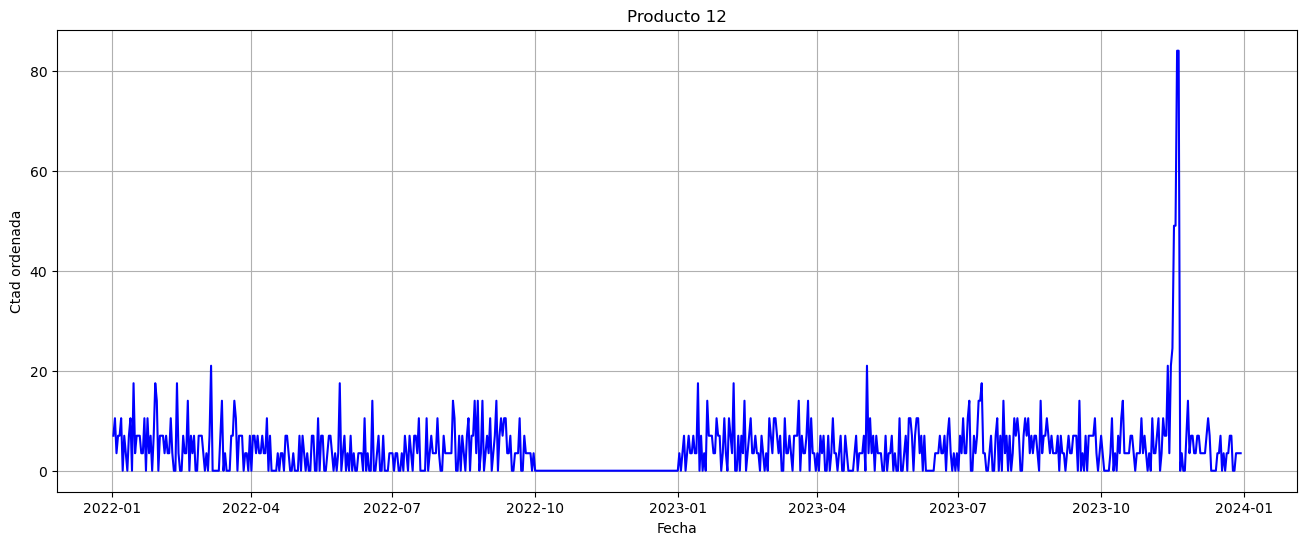

In [31]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 6))
plt.plot(product12, color='blue', linestyle='-')
plt.title('Producto 12')
plt.xlabel('Fecha')
plt.ylabel('Ctad ordenada')
plt.grid(True)
plt.show()

In [32]:
print(product12.index.freq)

None


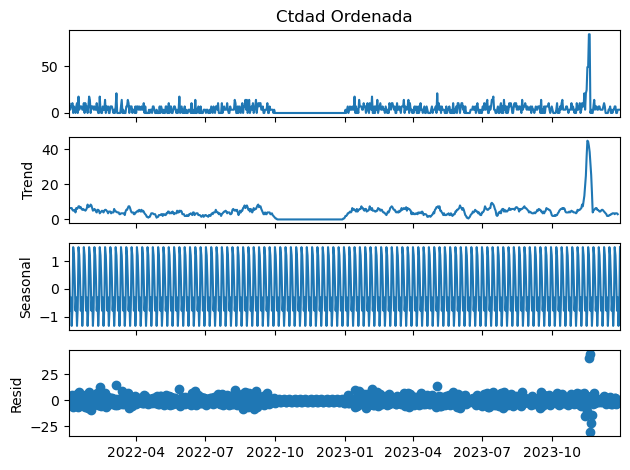

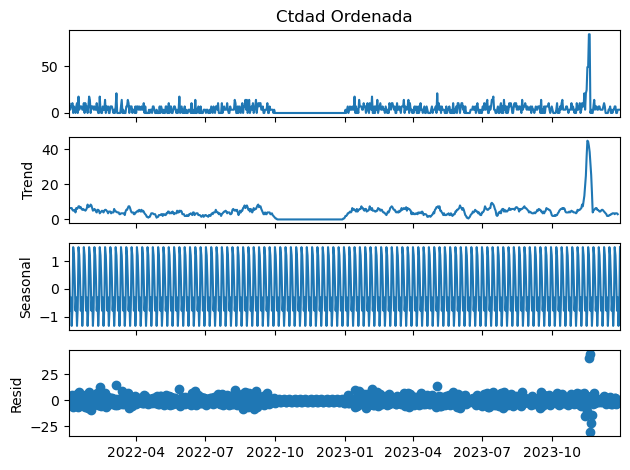

In [33]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_data = seasonal_decompose(product12, model="additive")
decompose_data.plot()

In [34]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(product12, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -7.092838253193569
2. P-Value :  4.365100919772135e-10
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 720
5. Critical Values :
	 1% :  -3.439464954327953
	 5% :  -2.8655625802683473
	 10% :  -2.5689120852623457


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 14 must be < 10.

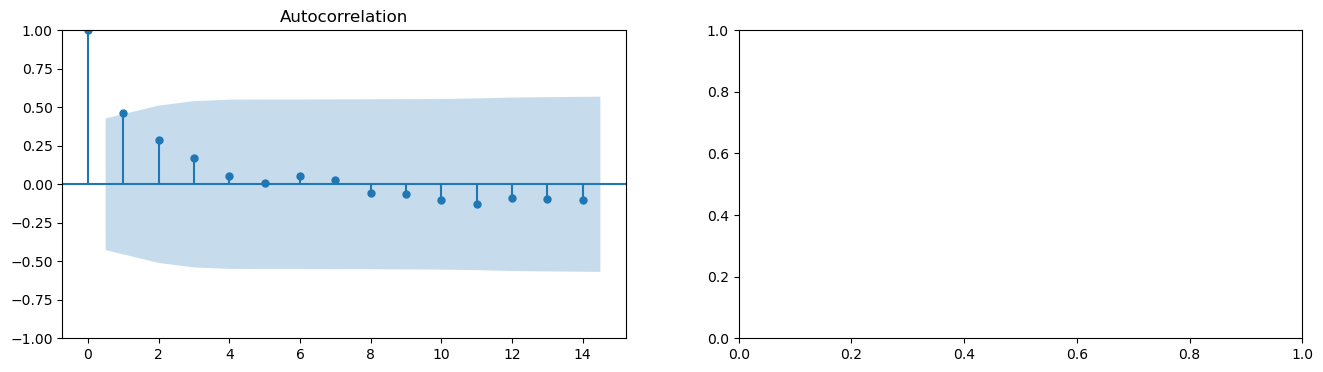

In [35]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

lag_acf = acf(product12, nlags=20)
lag_pacf = pacf(product12, nlags=20, method='ols')

fig, ax = plt.subplots(1,2,figsize=(16,4))
plot_acf(lag_acf, ax=ax[0])
plot_pacf(lag_pacf, ax=ax[1])


plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(product12, test_size = 0.10, shuffle = False)

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
train_smoth = train.copy()
train_smoth = SimpleExpSmoothing(np.asarray(train))

train_smoth._index = pd.to_datetime(train.index)
train_smoth = train_smoth.fit(smoothing_level=0.3).fittedvalues

train_new = pd.Series(train_smoth, index=train.index)

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
test_smoth = test.copy()
test_smoth = SimpleExpSmoothing(np.asarray(test))

test_smoth._index = pd.to_datetime(test.index)
test_smoth = test_smoth.fit(smoothing_level=0.3).fittedvalues

test_new = pd.Series(test_smoth, index=test.index)

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(train_new, color='green')

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(train, label='Train')

In [ ]:
test_new

In [ ]:
pip install pmdarima

In [ ]:
import pmdarima as pmd

model=pmd.auto_arima(train_new,start_p=1,start_q=1,
                     test='kpss',m=7,seasonal=True,trace=True)

In [ ]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(train_new,order=(1,1,2),seasonal_order=(1,0,2,7))
results=model.fit()
predictions = results.predict(start='2023-10-19', end='2023-12-30')

In [ ]:
print(results.summary())

In [ ]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test_new, predictions)
print('Test MSE: %.5f' % error)

In [ ]:
from sklearn.metrics import r2_score 

error = r2_score(test_new, predictions)
print('Test COD: %.5f' % error)

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(test_new, color = 'blue')
plt.plot(predictions, color = 'green')
plt.show()

# Prophet - Producto 12

In [10]:
p12_2 = df[df['Encoded Products'] == 'Producto 12']
p12_2 = p12_2[['Ctdad Ordenada','date']]

In [11]:
p12_2.describe()

,Ctdad Ordenada,date
count,444.000000,444
mean,7.070946,2023-01-20 11:37:17.837837568
min,3.500000,2022-01-02 00:00:00
25%,3.500000,2022-06-29 18:00:00
50%,7.000000,2023-03-01 12:00:00
75%,7.000000,2023-08-12 06:00:00
max,84.000000,2023-12-30 00:00:00
std,6.950082,NaN


In [9]:
plt.figure(figsize=(16, 6))
plt.plot(p12_2['date'],p12_2['Ctdad Ordenada'], color='blue', linestyle='-')
plt.title('Producto 12')
plt.xlabel('Fecha')
plt.ylabel('Ctad ordenada')
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

In [22]:
#Debido a que se nota un pico muy grande a finales de 2023, se reemplaza con la media de su columna(excluyendo este valor)
max_value = p12_2['Ctdad Ordenada'].max()
mean_without_max = p12_2.loc[p12_2['Ctdad Ordenada'] != max_value, 'Ctdad Ordenada'].mean()
p12_2.loc[p12_2['Ctdad Ordenada'] == max_value, 'Ctdad Ordenada'] = mean_without_max

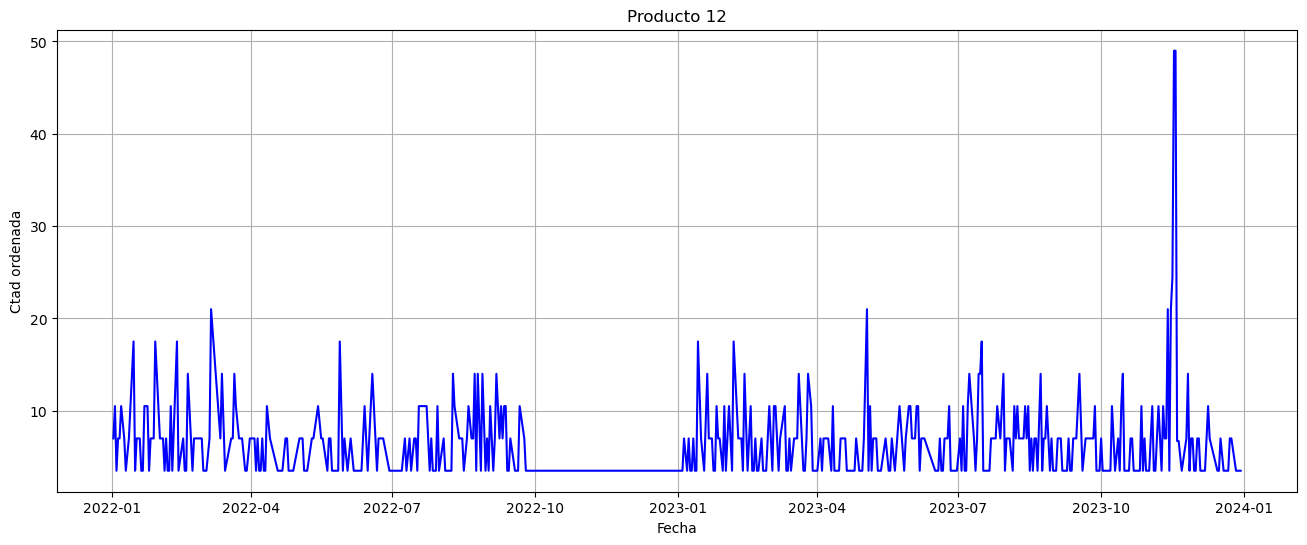

In [23]:
plt.figure(figsize=(16, 6))
plt.plot(p12_2['date'],p12_2['Ctdad Ordenada'], color='blue', linestyle='-')
plt.title('Producto 12')
plt.xlabel('Fecha')
plt.ylabel('Ctad ordenada')
plt.grid(True)
plt.show()

In [24]:
#Se crea ahora las columnas 'ds' y 'y' debido a que el modelo así lo pide
p12_2['ds'] = p12_2['date']
p12_2['y'] = p12_2['Ctdad Ordenada']

#Se agarra aproximadamente el 80% de los datos para entrenamiento.
cutoff_date = pd.Timestamp('2023-08-01')
train = p12_2[p12_2['ds'] < cutoff_date]
test = p12_2[p12_2['ds'] >= cutoff_date]

In [25]:
#Hacer el modelo prophet
model = Prophet()

model.add_country_holidays(country_name='MX')  # Se añaden también los días festivos del país(estos solo incluyen los de la librería)

#Entrenar el modelo con el dataset de train
model.fit(train)

21:01:20 - cmdstanpy - INFO - Chain [1] start processing
21:01:20 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
# Crear un dataframe con lo que es el "futuro" para compararlo con el set de test.
future = model.make_future_dataframe(periods=len(test))

# Hace predicciones con el set de entrenamiento.
forecast = model.predict(future)

In [27]:
print(model.train_holiday_names)#Se ve la lista de días especiales de holiday

0              New Year's Day
1            Constitution Day
2    Benito Juárez's birthday
3                   Labor Day
4            Independence Day
5              Revolution Day
6               Christmas Day
dtype: object


In [28]:
forecast.describe()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Benito Juárez's birthday,Benito Juárez's birthday_lower,Benito Juárez's birthday_upper,Christmas Day,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,444,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.0,...,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.0,444.0,444.0,444.000000
mean,2023-01-16 06:25:56.756756736,6.446968,2.065365,10.992344,6.446966,6.446969,0.028712,0.028712,0.028712,0.0,...,0.044692,0.044692,0.044692,0.032370,0.032370,0.032370,0.0,0.0,0.0,6.524029
min,2022-01-02 00:00:00,6.394008,0.488890,9.358255,6.393993,6.394025,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,-1.130796,-1.130796,-1.130796,0.0,0.0,0.0,5.263885
25%,2022-06-29 18:00:00,6.412629,1.472346,10.422094,6.412629,6.412630,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,-0.517570,-0.517570,-0.517570,0.0,0.0,0.0,5.964097
50%,2023-03-01 12:00:00,6.439489,1.805813,10.771714,6.439489,6.439489,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,-0.116938,-0.116938,-0.116938,0.0,0.0,0.0,6.325747
75%,2023-08-08 06:00:00,6.480648,2.684101,11.571389,6.480648,6.480648,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.691137,0.691137,0.691137,0.0,0.0,0.0,7.121211
max,2023-11-27 00:00:00,6.510987,7.925739,17.033475,6.510987,6.510987,6.374130,6.374130,6.374130,0.0,...,6.374130,6.374130,6.374130,1.491183,1.491183,1.491183,0.0,0.0,0.0,12.471405
std,NaN,0.037032,0.939871,0.945651,0.037034,0.037030,0.427320,0.427320,0.427320,0.0,...,0.483070,0.483070,0.483070,0.812751,0.812751,0.812751,0.0,0.0,0.0,0.927363


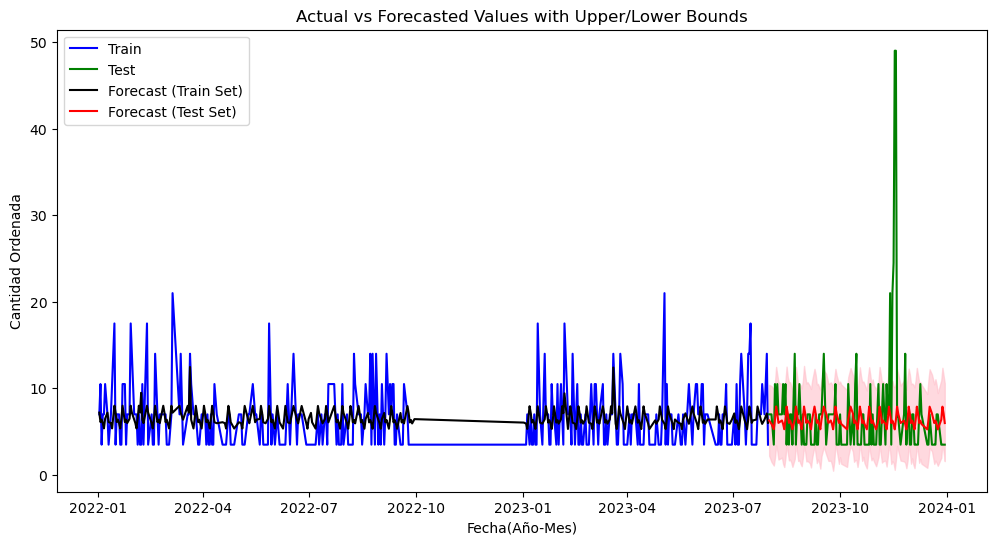

In [41]:
# Plotting results with yhat_upper and yhat_lower
plt.figure(figsize=(12, 6))
plt.plot(train['ds'], train['y'], label='Train', color='blue')
plt.plot(test['ds'], test['y'], label='Test', color='green')
plt.plot(train['ds'], forecast['yhat'][:len(train)], label='Forecast (Train Set)', color='black')
plt.plot(test['ds'], forecast['yhat'][-119:], label='Forecast (Test Set)', color='red')
plt.fill_between(test['ds'], forecast.loc[len(train):len(train)+len(test)-1, 'yhat_lower'], forecast.loc[len(train):len(train)+len(test)-1, 'yhat_upper'], color='pink', alpha=0.6)
plt.xlabel('Fecha(Año-Mes)')
plt.ylabel('Cantidad Ordenada')
plt.legend()
plt.title('Actual vs Forecasted Values with Upper/Lower Bounds')
plt.show()

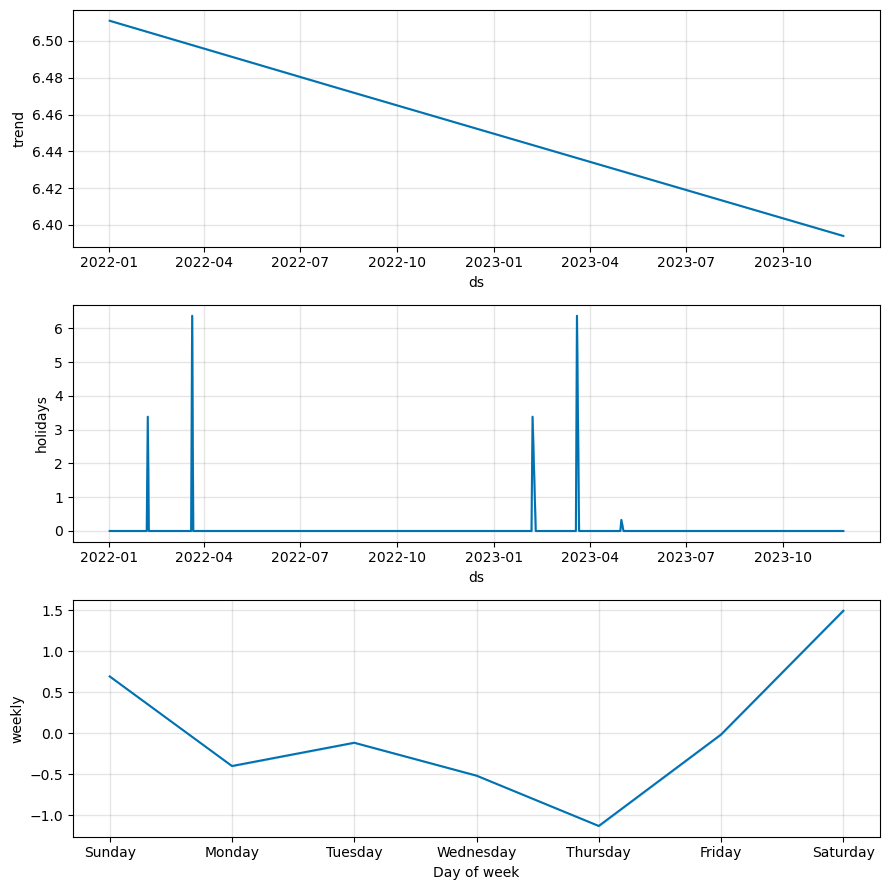

In [30]:
fig = model.plot_components(forecast)
#Visualizar las tendencias a nivel

In [31]:
#Calcular MAPE
actual_values = test['y']
forecast_values_test = forecast.loc[len(train):len(train)+len(test)-1, 'yhat']
mape_test = mean_absolute_error(actual_values, forecast_values_test) / actual_values.mean() * 100

print(f"Mean Absolute Percentage Error (MAPE) for Test Set: {mape_test:.2f}%")

actual_values_train = train['y']
forecast_values_train = forecast.loc[:len(train)-1, 'yhat']
mape_test = mean_absolute_error(actual_values_train, forecast_values_train) / actual_values_train.mean() * 100

print(f"Mean Absolute Percentage Error (MAPE) for Train Set: {mape_test:.2f}%")
#Se espera que el MAPE sea mayor en el test set, debido a que son valores que no ha "visto" el modelo.

Mean Absolute Percentage Error (MAPE) for Test Set: 48.28%
Mean Absolute Percentage Error (MAPE) for Train Set: 41.44%


# Prophet -  Nacional

In [9]:
Mex = df[['Encoded Products','Ctdad Ordenada','date']]
Mex = Mex[['Ctdad Ordenada','date']]

# Agrupar por fecha y sumar los valores numéricos
Mex_agrupado = Mex.groupby('date')['Ctdad Ordenada'].sum().reset_index()

# Crear un nuevo DataFrame con fechas únicas y sus valores numéricos totales
Mex = Mex_agrupado.rename(columns={'date': 'date', 'Ctdad Ordenada': 'Ctdad Ordenada'})
Mex

,date,Ctdad Ordenada
0,2022-01-02,255.5
1,2022-01-03,238.0
2,2022-01-04,367.5
3,2022-01-05,273.0
4,2022-01-06,182.0
...,...,...
632,2023-12-27,630.0
633,2023-12-28,651.0
634,2023-12-29,581.0
635,2023-12-30,721.0


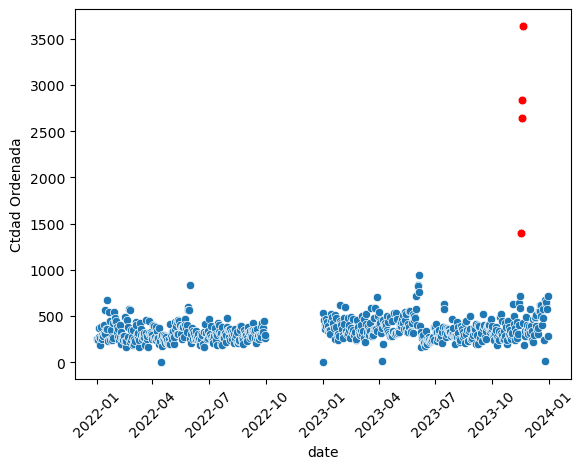

          date  Ctdad Ordenada
592 2023-11-17          1403.5
593 2023-11-18          2639.0
594 2023-11-19          2838.5
595 2023-11-20          3640.0


In [10]:
import seaborn as sns
# Assuming 'df' is your DataFrame with columns 'date' and 'numeric_column'
# Identify outliers (e.g., using z-scores)
z_scores = (Mex['Ctdad Ordenada'] - Mex['Ctdad Ordenada'].mean()) / Mex['Ctdad Ordenada'].std()
outliers = Mex[abs(z_scores) > 3]  # Consider values beyond 3 standard deviations as outliers

# Create a scatter plot with outliers highlighted
sns.scatterplot(x='date', y='Ctdad Ordenada', data=Mex)
sns.scatterplot(x='date', y='Ctdad Ordenada', data=outliers, color='red', s=40)  # Highlight outliers

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Store outliers in a new DataFrame
outliers_df = pd.DataFrame(outliers)

print(outliers_df)

#mean_without_outliers = Mex.loc[~Mex.index.isin(outliers.index), 'Ctdad Ordenada'].mean()

# Reemplazar los valores de los outliers con la media
#df.loc[outliers.index, 'Ctdad Ordenada'] = mean_without_outliers

<Axes: >

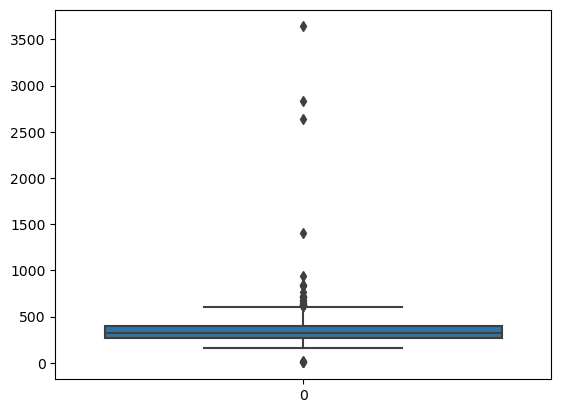

In [12]:
sns.boxplot(Mex['Ctdad Ordenada'])

In [13]:
Mex.describe()

,date,Ctdad Ordenada
count,637,637.000000
mean,2023-01-07 17:10:49.921507072,360.879121
min,2022-01-02 00:00:00,3.500000
25%,2022-06-10 00:00:00,269.500000
50%,2023-02-16 00:00:00,325.500000
75%,2023-07-25 00:00:00,402.500000
max,2023-12-31 00:00:00,3640.000000
std,NaN,223.268846


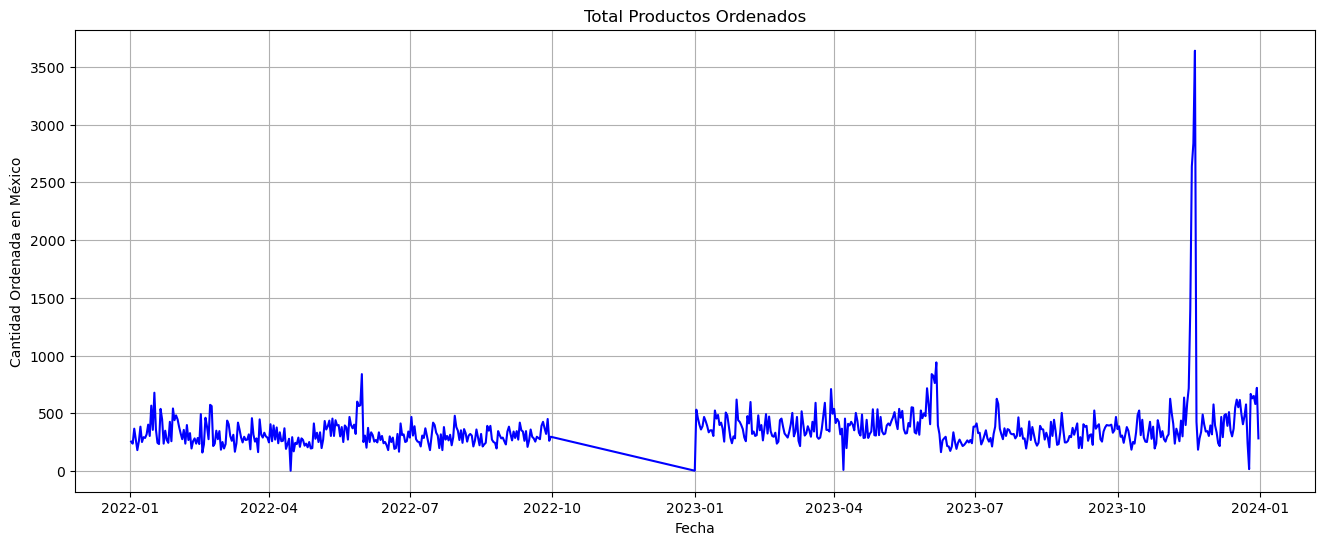

In [14]:
plt.figure(figsize=(16, 6))
plt.plot(Mex['date'],Mex['Ctdad Ordenada'], color='blue', linestyle='-')
plt.title('Total Productos Ordenados')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Ordenada en México')
plt.grid(True)
plt.show()

In [32]:
#Debido a que se nota un pico muy grande a finales de 2023, se reemplaza con la media de su columna(excluyendo este valor)
max_value = Mex['Ctdad Ordenada'].max()
mean_without_max = Mex.loc[Mex['Ctdad Ordenada'] != max_value, 'Ctdad Ordenada'].mean()
Mex.loc[Mex['Ctdad Ordenada'] == max_value, 'Ctdad Ordenada'] = mean_without_max

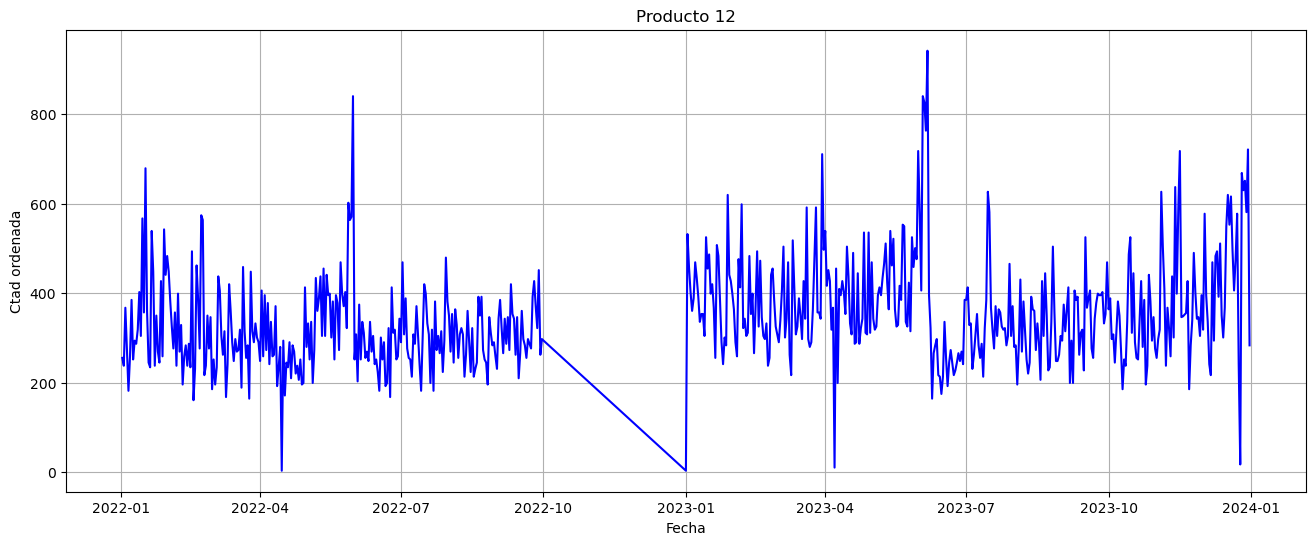

In [33]:
plt.figure(figsize=(16, 6))
plt.plot(Mex['date'],Mex['Ctdad Ordenada'], color='blue', linestyle='-')
plt.title('Producto 12')
plt.xlabel('Fecha')
plt.ylabel('Ctad ordenada')
plt.grid(True)
plt.show()

In [34]:
#Se crea ahora las columnas 'ds' y 'y' debido a que el modelo así lo pide
Mex['ds'] = Mex['date']
Mex['y'] = Mex['Ctdad Ordenada']

#Se agarra aproximadamente el 80% de los datos para entrenamiento.
cutoff_date = pd.Timestamp('2023-08-01')
train = Mex[Mex['ds'] < cutoff_date]
test = Mex[Mex['ds'] >= cutoff_date]

In [35]:
#Hacer el modelo prophet
model = Prophet()

mexican_holidays_df = pd.DataFrame({
    'holiday': 'El Buen fin',
    'ds': pd.to_datetime(['2023-11-17', '2023-11-18', '2023-11-19','2023-11-20'])  # Example dates for Mexican holidays
})

model.holidays = mexican_holidays_df
model.add_country_holidays(country_name='MX')  # Se añaden también los días festivos del país(estos solo incluyen los de la librería)

#Entrenar el modelo con el dataset de train
model.fit(train)

22:58:27 - cmdstanpy - INFO - Chain [1] start processing
22:58:27 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
# Crear un dataframe con lo que es el "futuro" para compararlo con el set de test.
future = model.make_future_dataframe(periods=len(test))

# Hace predicciones con el set de entrenamiento.
forecast = model.predict(future)

In [37]:
print(model.train_holiday_names)#Se ve la lista de días especiales de holiday

0                 El Buen fin
1              New Year's Day
2            Constitution Day
3    Benito Juárez's birthday
4                   Labor Day
5            Independence Day
6              Revolution Day
7               Christmas Day
dtype: object


In [38]:
forecast.describe()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Benito Juárez's birthday,Benito Juárez's birthday_lower,Benito Juárez's birthday_upper,Christmas Day,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,637,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.0,...,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.0,637.0,637.0,637.000000
mean,2023-01-07 17:10:49.921507072,350.068021,225.910275,475.390672,349.638428,350.508973,0.485013,0.485013,0.485013,0.0,...,0.371949,0.371949,0.371949,-0.114969,-0.114969,-0.114969,0.0,0.0,0.0,350.325001
min,2022-01-02 00:00:00,303.517004,-121.448758,135.145198,303.517004,303.517004,0.000000,0.000000,0.000000,0.0,...,-349.935778,-349.935778,-349.935778,-58.360225,-58.360225,-58.360225,0.0,0.0,0.0,18.107677
25%,2022-06-10 00:00:00,319.002151,190.586773,439.330404,319.002151,319.002151,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,-42.361757,-42.361757,-42.361757,0.0,0.0,0.0,315.641075
50%,2023-02-16 00:00:00,365.110097,219.393542,468.918891,365.110097,365.110097,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,-8.863651,-8.863651,-8.863651,0.0,0.0,0.0,343.499279
75%,2023-07-25 00:00:00,376.989738,262.804428,513.409585,376.933663,376.989738,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,24.886707,24.886707,24.886707,0.0,0.0,0.0,389.651321
max,2023-12-31 00:00:00,381.447689,419.320342,670.736986,377.826855,386.126134,154.476612,154.476612,154.476612,0.0,...,154.476612,154.476612,154.476612,85.560420,85.560420,85.560420,0.0,0.0,0.0,550.329001
std,NaN,29.167507,56.006948,55.864581,28.736816,29.640189,8.649008,8.649008,8.649008,0.0,...,17.996687,17.996687,17.996687,43.894406,43.894406,43.894406,0.0,0.0,0.0,55.775970


In [39]:
Mex['date'][595]

Timestamp('2023-11-20 00:00:00')

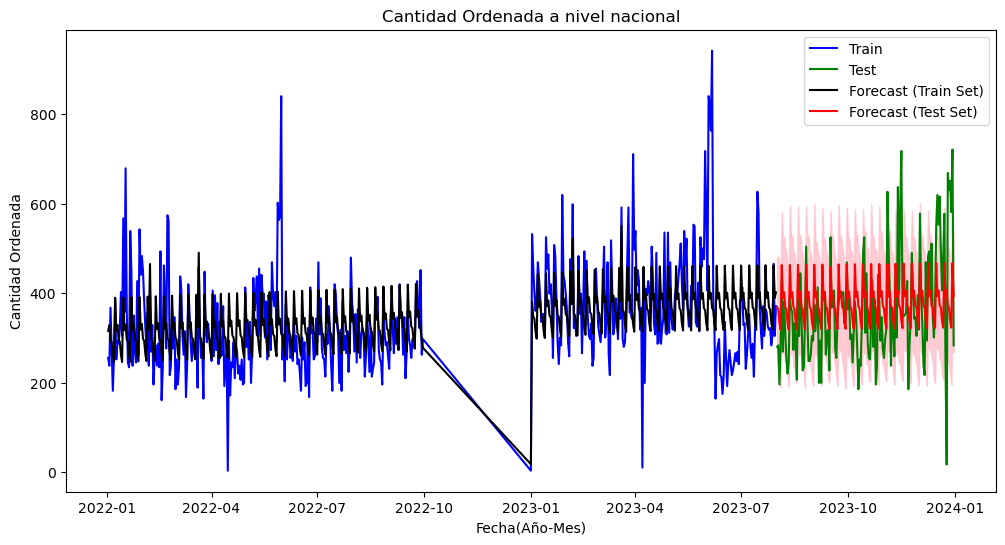

In [44]:
# Plotting results with yhat_upper and yhat_lower
plt.figure(figsize=(12, 6))
plt.plot(train['ds'], train['y'], label='Train', color='blue')
plt.plot(test['ds'], test['y'], label='Test', color='green')
plt.plot(train['ds'], forecast['yhat'][:len(train)], label='Forecast (Train Set)', color='black')
plt.plot(test['ds'], forecast['yhat'][-len(test):], label='Forecast (Test Set)', color='red')
plt.fill_between(test['ds'], forecast.loc[len(train):len(train)+len(test)-1, 'yhat_lower'], forecast.loc[len(train):len(train)+len(test)-1, 'yhat_upper'], color='pink', alpha=0.8)
plt.xlabel('Fecha(Año-Mes)')
plt.ylabel('Cantidad Ordenada')
plt.legend()
plt.title('Cantidad Ordenada a nivel nacional')
plt.show()


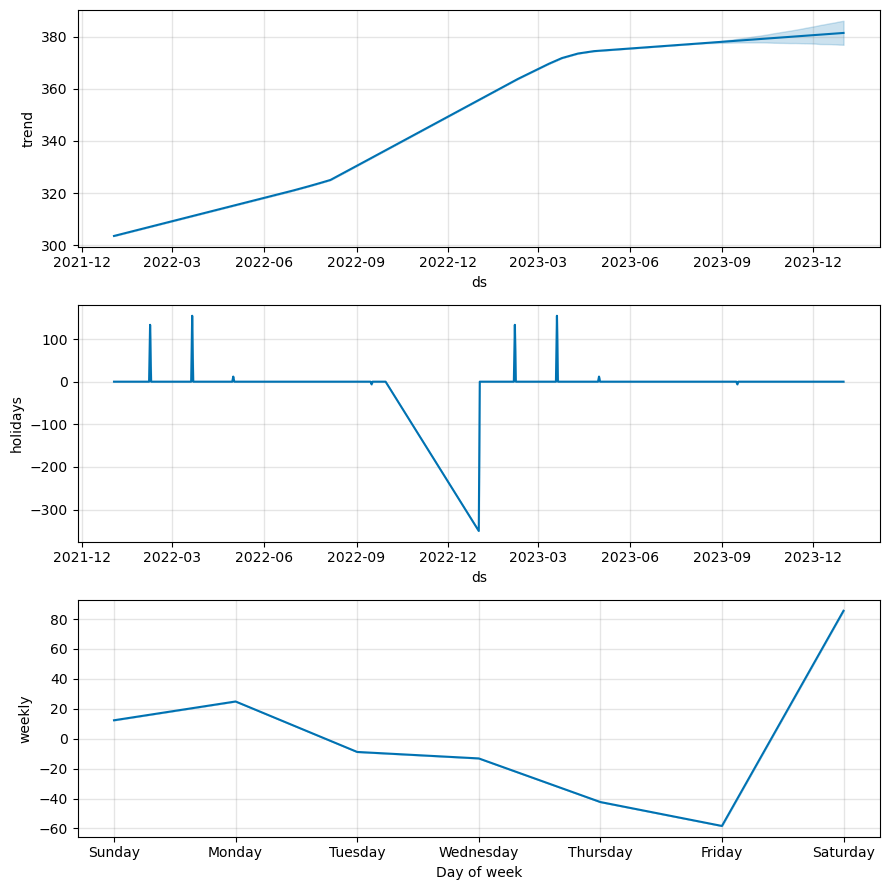

In [41]:
fig = model.plot_components(forecast)
#Visualizar las tendencias generales, tendencia por día de la semana y dias festivos.

In [42]:
#Calcular MAPE
actual_values = test['y']
forecast_values_test = forecast.loc[len(train):len(train)+len(test)-1, 'yhat']
mape_test = mean_absolute_error(actual_values, forecast_values_test) / actual_values.mean() * 100

print(f"Mean Absolute Percentage Error (MAPE) for Test Set: {mape_test:.2f}%")

actual_values_train = train['y']
forecast_values_train = forecast.loc[:len(train)-1, 'yhat']
mape_test = mean_absolute_error(actual_values_train, forecast_values_train) / actual_values_train.mean() * 100

print(f"Mean Absolute Percentage Error (MAPE) for Train Set: {mape_test:.2f}%")
#Se espera que el MAPE sea mayor en el test set, debido a que son valores que no ha "visto" el modelo.

Mean Absolute Percentage Error (MAPE) for Test Set: 23.03%
Mean Absolute Percentage Error (MAPE) for Train Set: 20.18%


In [43]:
from sklearn.metrics import r2_score
y_true = Mex['y'].values  # Actual values
y_pred = forecast['yhat'].values[:len(df)]
# Calculate R2 score
r2 = r2_score(y_true, y_pred)

#Se tiene un relativamente buen MAPE pero R^2 muy bajo.
print("R2 Score:", r2)

R2 Score: 0.22840997560378629


In [138]:
#0.09 r2 score
#MAPE 33.23/20.18 antes de quitar cualquier outlier

#Reemplazando los 4 outliers grandes con la media
#0.22 r2 score
#MAPE 23.03/20.18 

In [ ]:
#Encontrar factores adicionales que hagan que crezca o disminuya la demanada
#1.Campañas publicitarias (preguntar)
#2.Ingreso PIB per Capita(investigar)
#3.Crecimiento de Población(investigar)
#4.Desarrollo Urbano(investigar)
#Quizas hacer uno de regresion multivariado(puede ser con interacciones y/o polinomial)con más factores podría ser mejor,

In [ ]:
#1. Metrica de comparacion: lo que vendieron y lo que pronosticaron sacan un promedio en absolutos.
#2. Entregables: los pynotebooks. Cualquier plus es bueno.
#3. Resolucion: Es general en toda la nacion por producto
#4. Precio Unitario cambia: Cambia de precio por promocion en el producto. Diciembre y Enero y el hotasle de mayo junio por alto.(3% 5% aprox. de descuento)
#5. Cantidad Productos(unicamente colchones):Productos más de 120 fueron extras. 4 tamaños principales (ind, matrimonial, queen, king)
#7. Descubrir un porque del cambio drástico dentro del rango de los datos.

# Otra madre del jason

In [ ]:
son = pd.read_json('1.json', lines=True)
son

In [ ]:
len(son['id'][0])